In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,RandomForestRegressor
from sklearn.svm import LinearSVR

In [41]:
data=pd.read_csv("android-games.csv")
data

,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid
0,1,Garena Free Fire- World Series,86273129,500.0 M,4,2.1,6.9,0.0,GAME ACTION,63546766,4949507,3158756,2122183,12495915,False
1,2,PUBG MOBILE - Traverse,37276732,500.0 M,4,1.8,3.6,0.0,GAME ACTION,28339753,2164478,1253185,809821,4709492,False
2,3,Mobile Legends: Bang Bang,26663595,100.0 M,4,1.5,3.2,0.0,GAME ACTION,18777988,1812094,1050600,713912,4308998,False
3,4,Brawl Stars,17971552,100.0 M,4,1.4,4.4,0.0,GAME ACTION,13018610,1552950,774012,406184,2219794,False
4,5,Sniper 3D: Fun Free Online FPS Shooting Game,14464235,500.0 M,4,0.8,1.5,0.0,GAME ACTION,9827328,2124154,1047741,380670,1084340,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1725,96,زوايا - لعبة ستحرك زوايا عقلك,112408,1.0 M,4,0.9,1.8,0.0,GAME WORD,101036,3607,3237,1229,3297,False
1726,97,Bible Word Puzzle - Free Bible Word Games,111595,1.0 M,4,0.9,2.3,0.0,GAME WORD,88950,14856,4297,1385,2103,False
1727,98,Scrabble® GO - New Word Game,110723,10.0 M,4,0.9,1.9,0.0,GAME WORD,64184,18332,9385,6688,12132,False
1728,99,Word Nut: Word Puzzle Games & Crosswords,109530,5.0 M,4,1.9,4.1,0.0,GAME WORD,99987,4766,1469,953,2353,False


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1730 entries, 0 to 1729
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rank              1730 non-null   int64  
 1   title             1730 non-null   object 
 2   total ratings     1730 non-null   int64  
 3   installs          1730 non-null   object 
 4   average rating    1730 non-null   int64  
 5   growth (30 days)  1730 non-null   float64
 6   growth (60 days)  1730 non-null   float64
 7   price             1730 non-null   float64
 8   category          1730 non-null   object 
 9   5 star ratings    1730 non-null   int64  
 10  4 star ratings    1730 non-null   int64  
 11  3 star ratings    1730 non-null   int64  
 12  2 star ratings    1730 non-null   int64  
 13  1 star ratings    1730 non-null   int64  
 14  paid              1730 non-null   bool   
dtypes: bool(1), float64(3), int64(8), object(3)
memory usage: 191.0+ KB


In [4]:
data.describe()

,rank,total ratings,average rating,growth (30 days),growth (60 days),price,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings
count,1730.000000,1.730000e+03,1730.000000,1730.000000,1730.000000,1730.000000,1.730000e+03,1.730000e+03,1.730000e+03,1.730000e+03,1.730000e+03
mean,50.386705,1.064332e+06,3.908092,321.735896,122.554971,0.010942,7.622315e+05,1.164366e+05,5.706307e+04,2.710336e+04,1.014950e+05
std,28.936742,3.429250e+06,0.290973,6018.914507,2253.891703,0.214987,2.538658e+06,3.021631e+05,1.495314e+05,8.154542e+04,4.083745e+05
min,1.000000,3.299300e+04,2.000000,0.000000,0.000000,0.000000,1.397500e+04,2.451000e+03,7.180000e+02,2.660000e+02,5.450000e+02
25%,25.000000,1.759992e+05,4.000000,0.100000,0.200000,0.000000,1.277300e+05,2.064300e+04,9.652500e+03,4.262250e+03,1.281200e+04
50%,50.000000,4.286065e+05,4.000000,0.500000,1.000000,0.000000,2.964340e+05,5.098050e+04,2.507800e+04,1.067550e+04,3.368600e+04
75%,75.000000,8.837970e+05,4.000000,1.700000,3.300000,0.000000,6.198358e+05,1.018140e+05,5.229500e+04,2.322875e+04,8.015725e+04
max,100.000000,8.627313e+07,4.000000,227105.700000,69441.400000,7.490000,6.354677e+07,5.404966e+06,3.158756e+06,2.122183e+06,1.249592e+07


In [5]:
data.shape

(1730, 15)

In [6]:
data.isnull().mean()*100

rank                0.0
title               0.0
total ratings       0.0
installs            0.0
average rating      0.0
growth (30 days)    0.0
growth (60 days)    0.0
price               0.0
category            0.0
5 star ratings      0.0
4 star ratings      0.0
3 star ratings      0.0
2 star ratings      0.0
1 star ratings      0.0
paid                0.0
dtype: float64

In [7]:
data['paid']=data['paid'].astype(int)

In [8]:
data.duplicated().sum()

0

## UNIVARIATE ANALYSIS

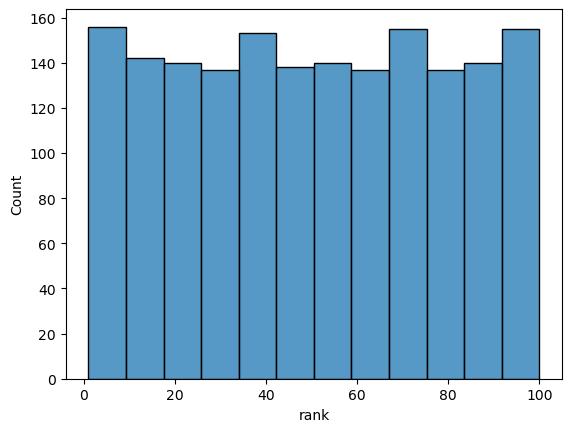

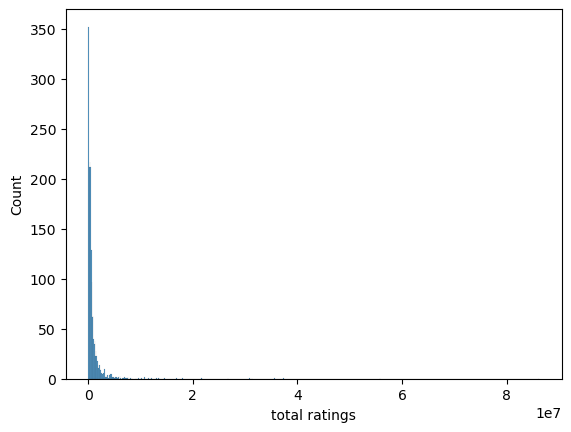

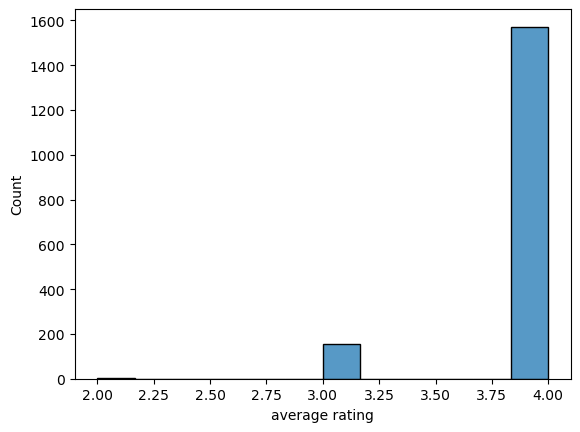

In [ ]:
for i in data.columns:
    if data[i].dtypes!="object":
        sns.histplot(x=data[i])
        plt.show()

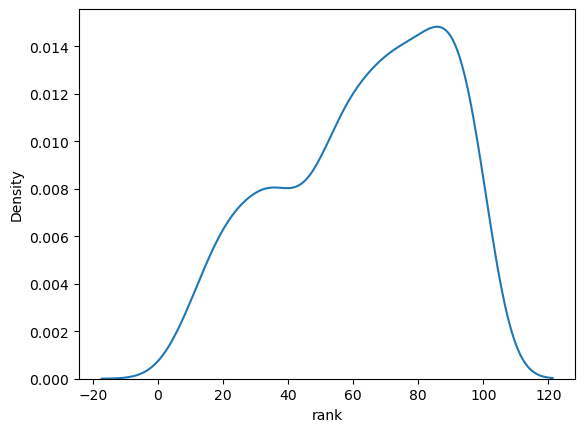

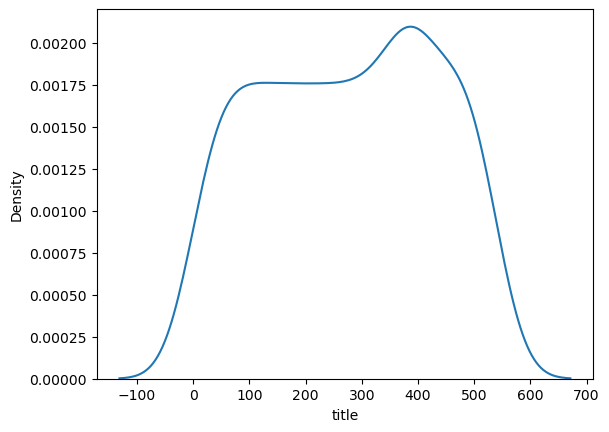

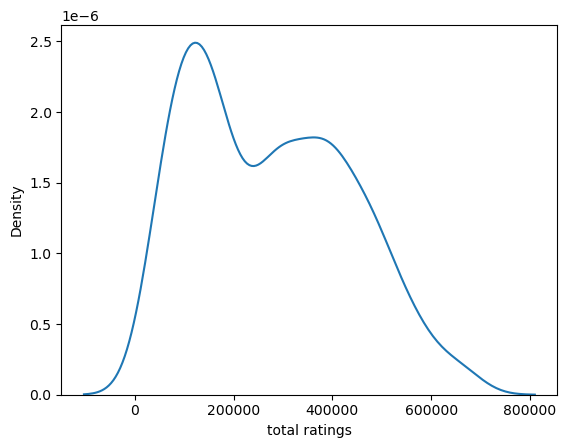

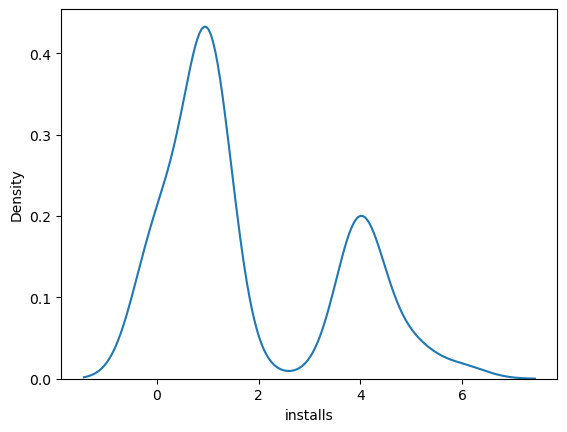

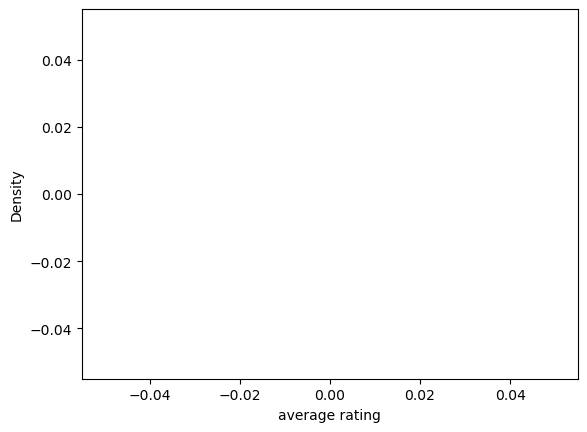

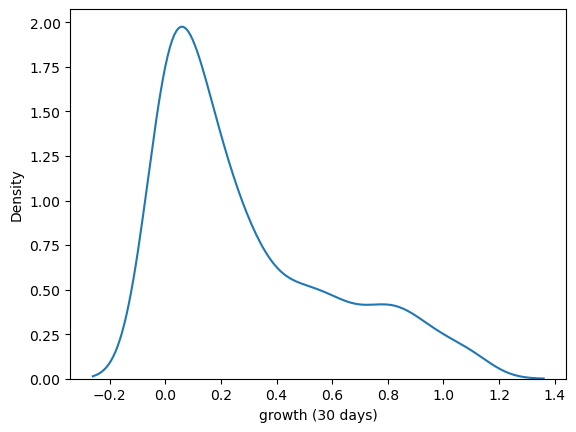

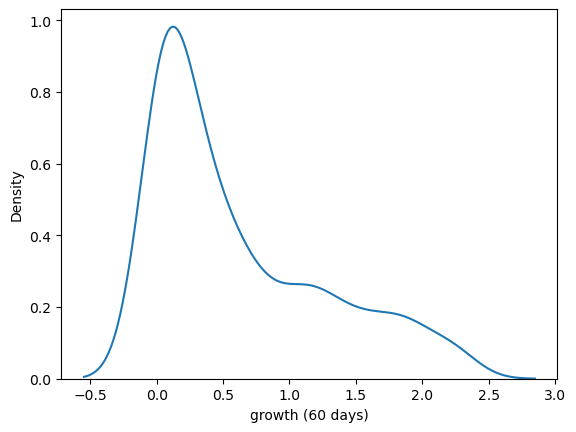

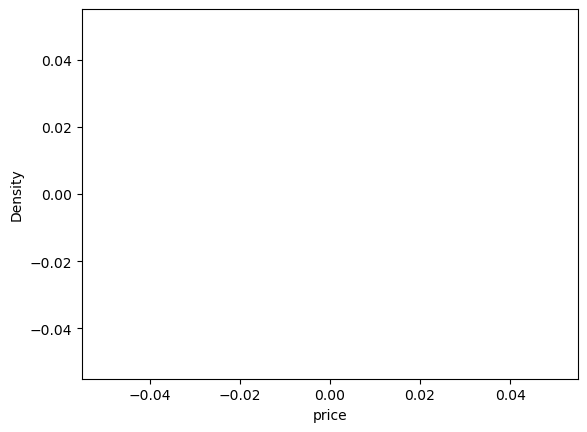

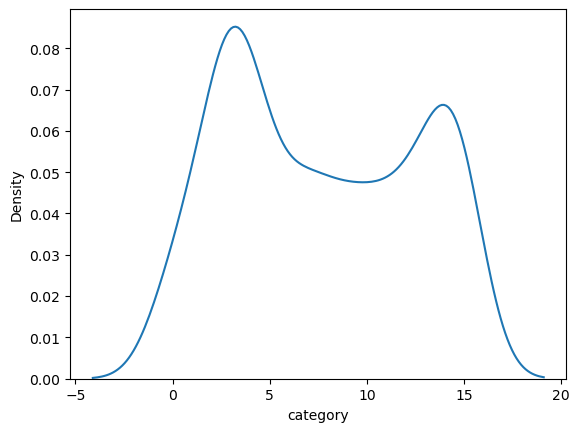

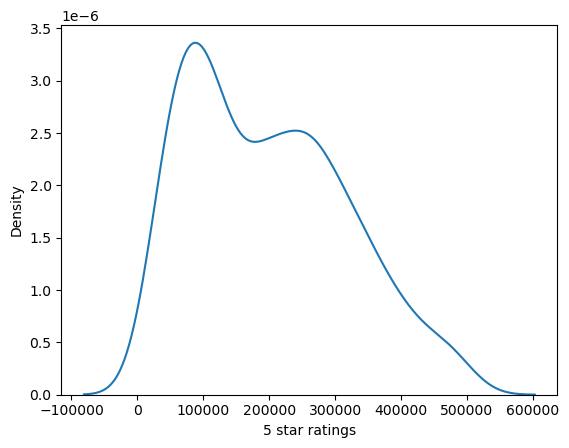

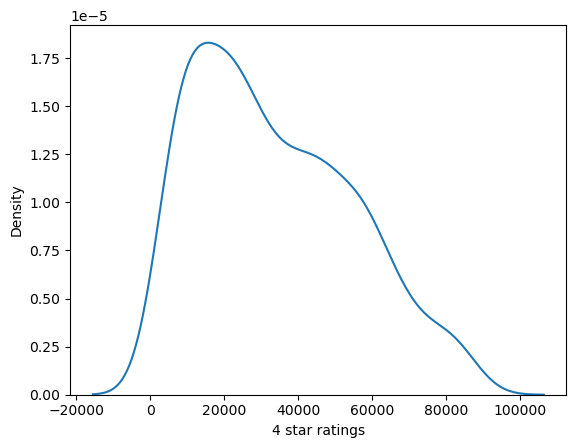

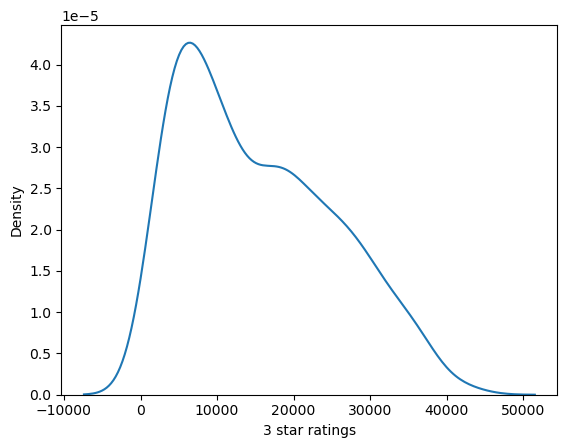

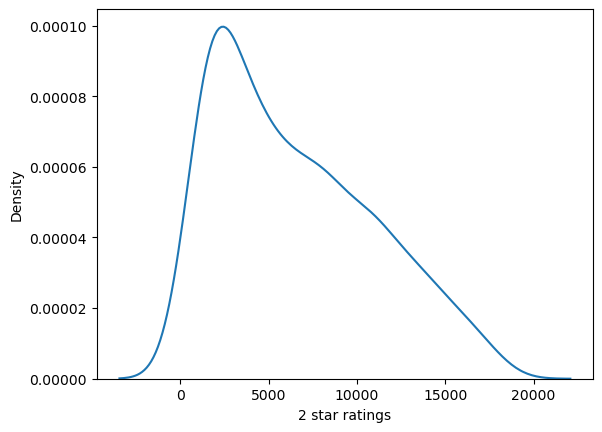

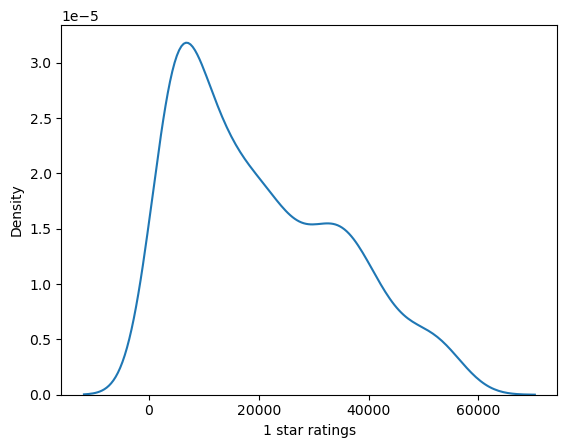

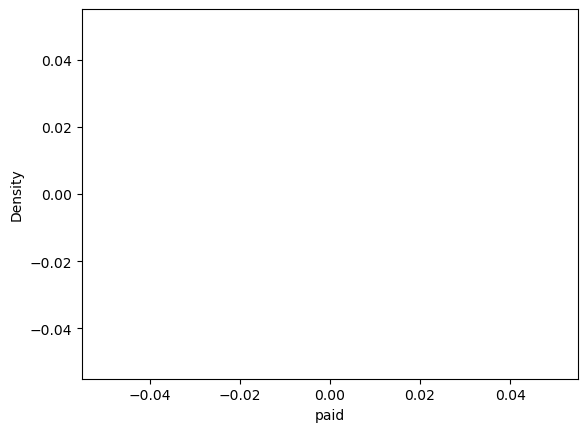

In [36]:
for i in data.columns:
    if data[i].dtypes!="object":
        sns.kdeplot(x=data[i])
        plt.show()

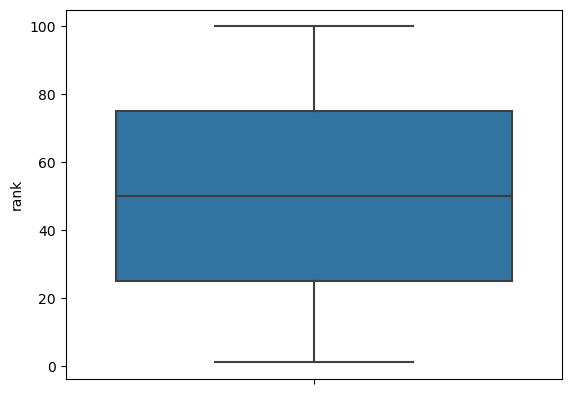

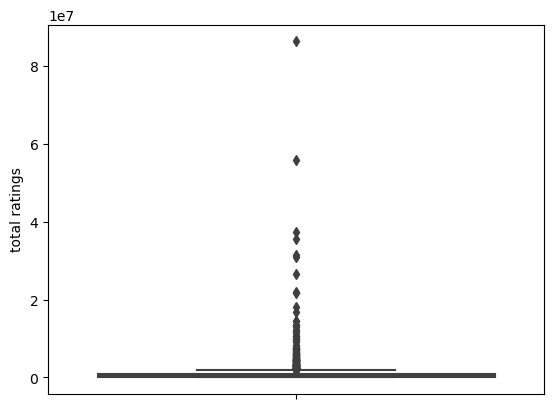

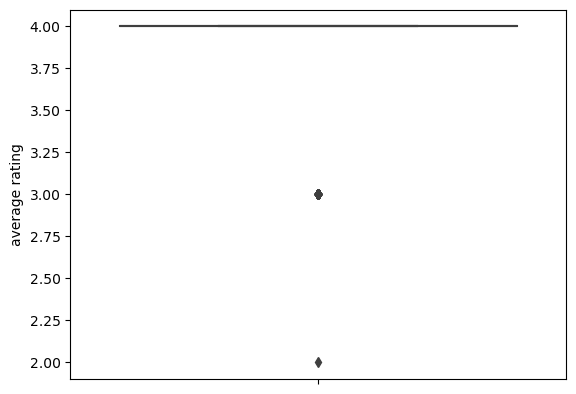

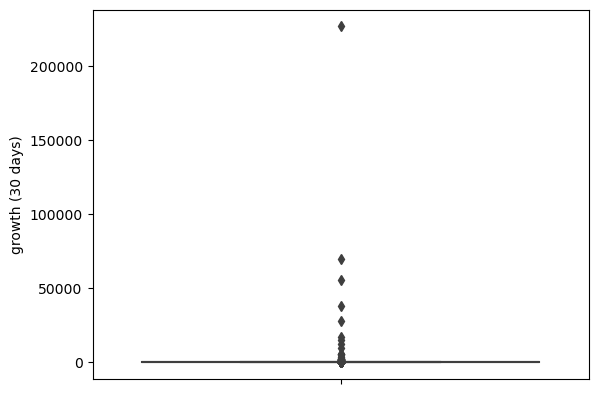

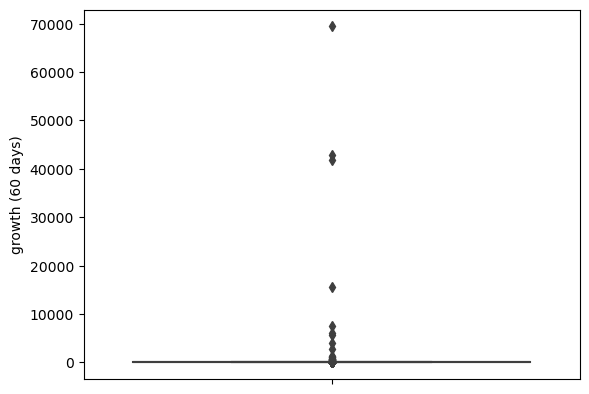

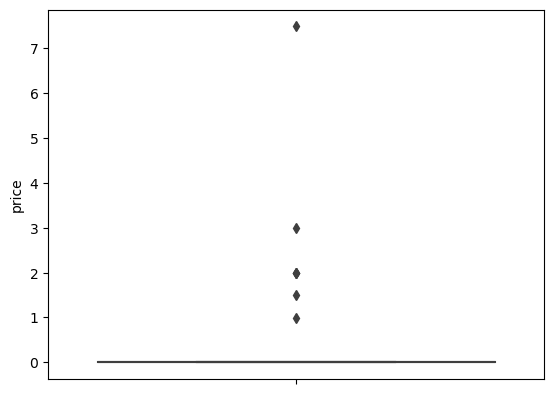

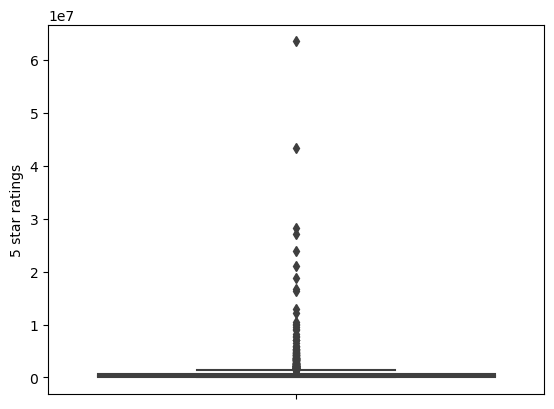

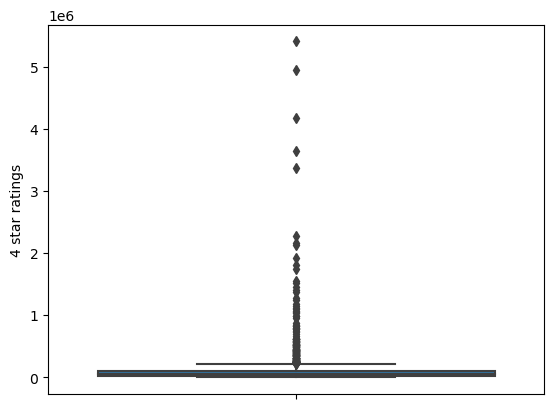

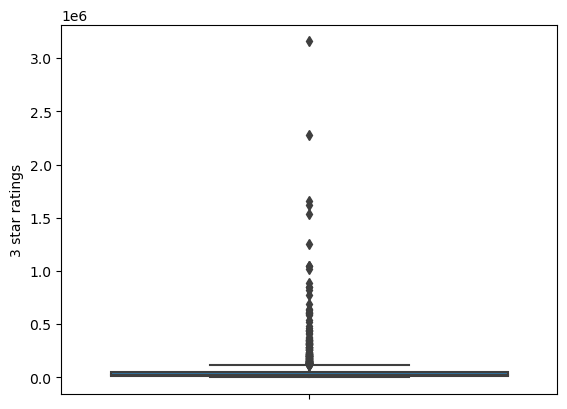

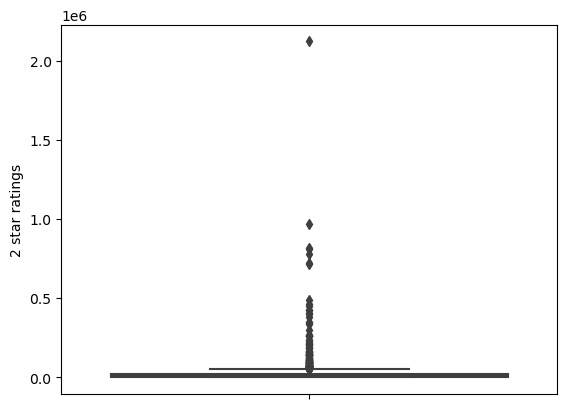

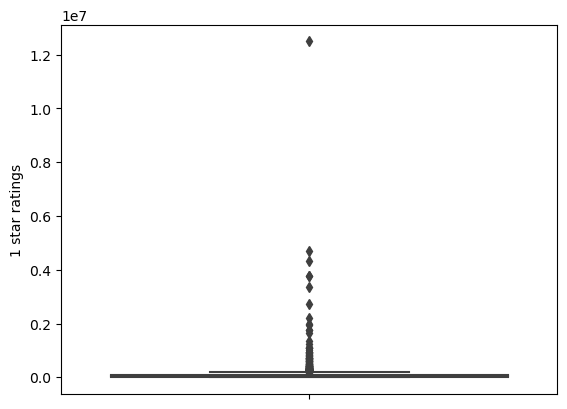

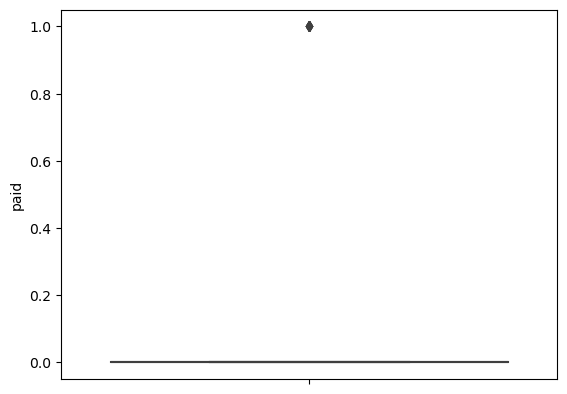

In [9]:
for i in data.columns:
    if data[i].dtypes!="object":
        sns.boxplot(y=data[i])
        plt.show()

In [10]:
data.columns

Index(['rank', 'title', 'total ratings', 'installs', 'average rating',
       'growth (30 days)', 'growth (60 days)', 'price', 'category',
       '5 star ratings', '4 star ratings', '3 star ratings', '2 star ratings',
       '1 star ratings', 'paid'],
      dtype='object')

## MULTIVARIATE ANALYSIS

### BAR PLOT

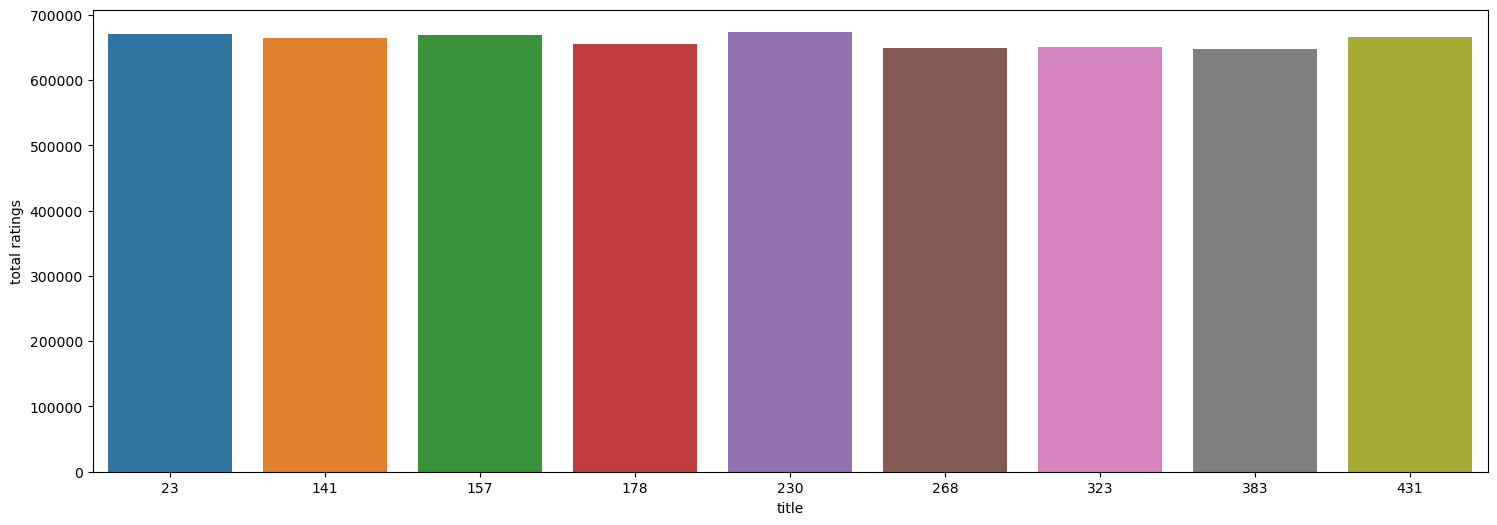

In [37]:
plt.figure(figsize=(18,6))
sns.barplot(x='title', y='total ratings', data=data.sort_values(by='total ratings',ascending=False)[:10]);

### LINE PLOT

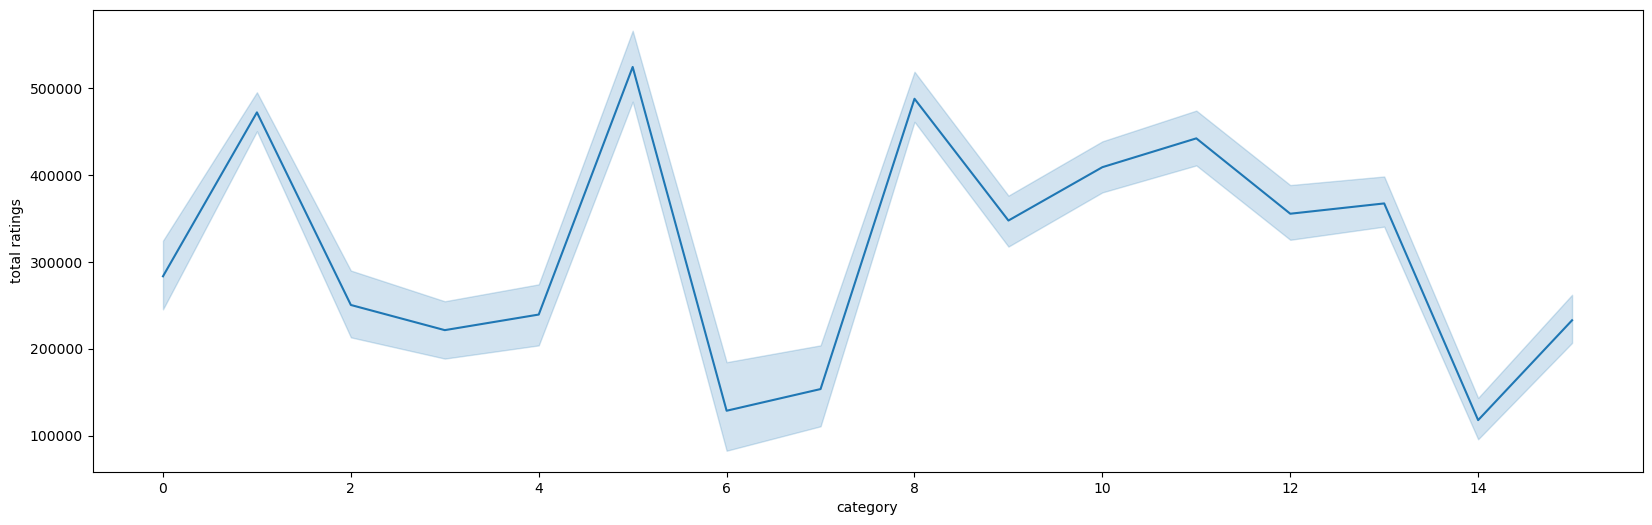

In [38]:
plt.figure(figsize=(20,6))
sns.lineplot(x='category',y='total ratings',data=data);

# OUTLIER TREATMENT

In [15]:
def outlier_limit(col):
    Q3,Q1=np.nanpercentile(col,[75,25])
    IQR=Q3-Q1
    UL=Q1+1.5*IQR
    LL=Q1-1.5*IQR
    return UL,LL

In [16]:
for column in data.columns:
    if data[column].dtype!='object':
        UL,LL=outlier_limit(data[column])
        data[column]=np.where((data[column]>UL)|(data[column]<LL),np.nan,data[column])

In [17]:
data.dropna(inplace=True)

## LABELENCORDING THE CATEGORICAL COLUMNS

In [20]:
le=LabelEncoder()

In [21]:
data['title']=le.fit_transform(data['title'])
data['category']=le.fit_transform(data['category'])
data['installs']=le.fit_transform(data['installs'])

## CHECKING THE CORRELATION WITH THE TARGET

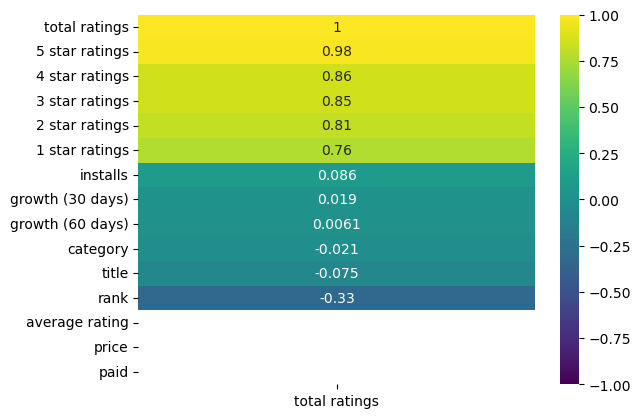

In [23]:
sns.heatmap(data.corr()[['total ratings']].sort_values(by='total ratings',ascending=False),vmin=-1,vmax=1,annot=True,cmap="viridis");

## LET'S TAKE ONLY THE COLUMNS WITH GOOD CORRELATION WITH THE TARGET

In [24]:
x=data[['5 star ratings','4 star ratings','3 star ratings']].values

In [25]:
y=data[['total ratings']].values

## FEATURE SCALLING

In [26]:
sc=StandardScaler()
x=sc.fit_transform(x)

## MODEL BUILDING

In [27]:
models={
    "LinearRegression":LinearRegression(),
    "Ridge":Ridge(),
    "LinearSVR":LinearSVR(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "GradientBoostingRegressor":GradientBoostingRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "RandomForestRegressor":RandomForestRegressor()
}

In [28]:
for name, model in models.items():
    scores = cross_val_score(model, x,y, scoring="neg_mean_squared_error",cv=10,n_jobs=-1)
    print("cross validation model : {}".format(name))
    rmse = np.sqrt(-scores)
    rmse_average = np.mean(rmse)
    print("AVERAGE RMSE: ",rmse_average)
    print("*"*100)

cross validation model : LinearRegression
AVERAGE RMSE:  12635.254278097684
****************************************************************************************************
cross validation model : Ridge
AVERAGE RMSE:  12642.616122235482
****************************************************************************************************
cross validation model : LinearSVR
AVERAGE RMSE:  310625.1553189516
****************************************************************************************************
cross validation model : DecisionTreeRegressor
AVERAGE RMSE:  18662.68374408829
****************************************************************************************************
cross validation model : GradientBoostingRegressor
AVERAGE RMSE:  14993.458106290307
****************************************************************************************************
cross validation model : AdaBoostRegressor
AVERAGE RMSE:  31997.8750893532
**********************************************

In [29]:
model=LinearRegression()

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [31]:
model.fit(x_train,y_train)

LinearRegression()

In [32]:
y_pred=model.predict(x)

In [33]:
OUTPUT=pd.DataFrame(zip(y,y_pred),columns=("ACTUAL","PREDICTED"),dtype=float)
OUTPUT.head()

,ACTUAL,PREDICTED
0,668761.0,660090.584571
1,530520.0,521155.352561
2,495725.0,516296.723039
3,486767.0,484945.814681
4,443044.0,446209.717500


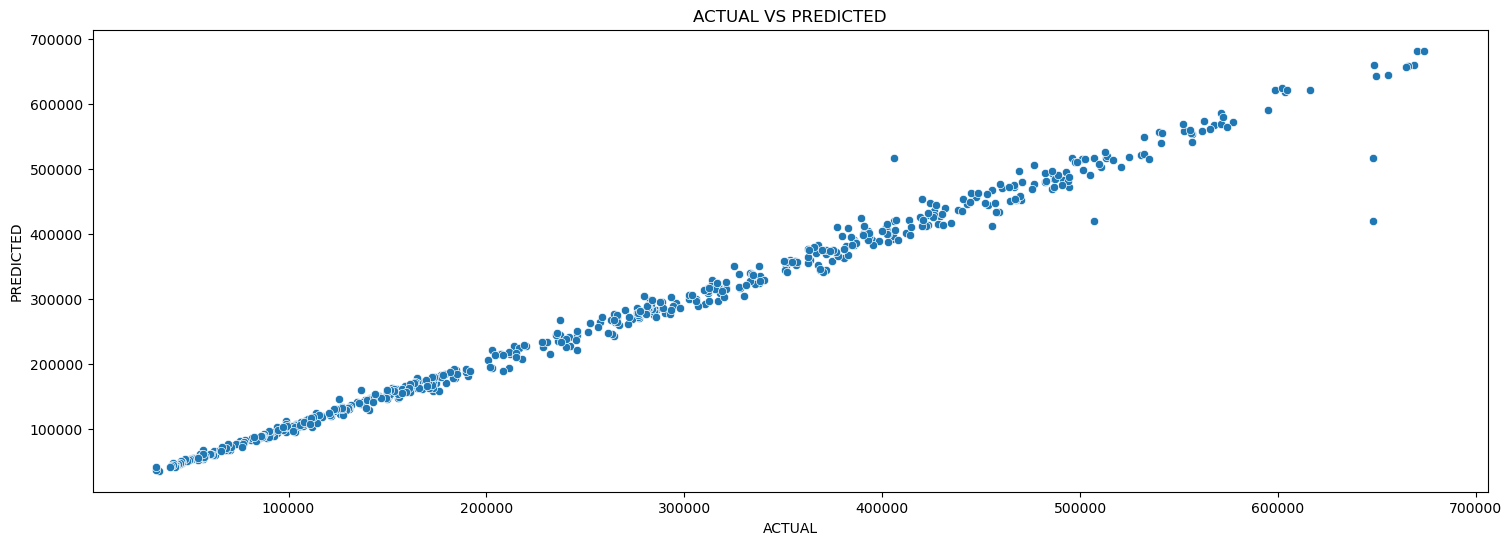

In [34]:
plt.figure(figsize=(18,6))
plt.title("ACTUAL VS PREDICTED")
sns.scatterplot(data=OUTPUT,x="ACTUAL",y="PREDICTED");

In [35]:
model.score(x,y)

0.9903274126631475